In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import r2_score
from keras import callbacks
import pickle

In [2]:
data = pd.read_csv("cac40.csv", parse_dates = True)

In [3]:
data.head(5)

,Date,Open,High,Low,Close,Turnover
0,03/01/2000,6024.38,6102.12,5901.77,5917.37,-
1,04/01/2000,5922.23,5925.07,5657.20,5672.02,-
2,05/01/2000,5521.83,5589.50,5461.59,5479.70,-
3,06/01/2000,5485.93,5530.26,5388.85,5450.11,-
4,07/01/2000,5423.88,5561.69,5423.88,5539.61,-


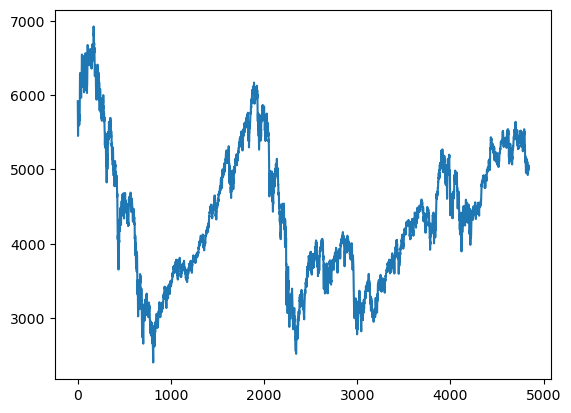

In [4]:
plt.plot(data.Close)

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

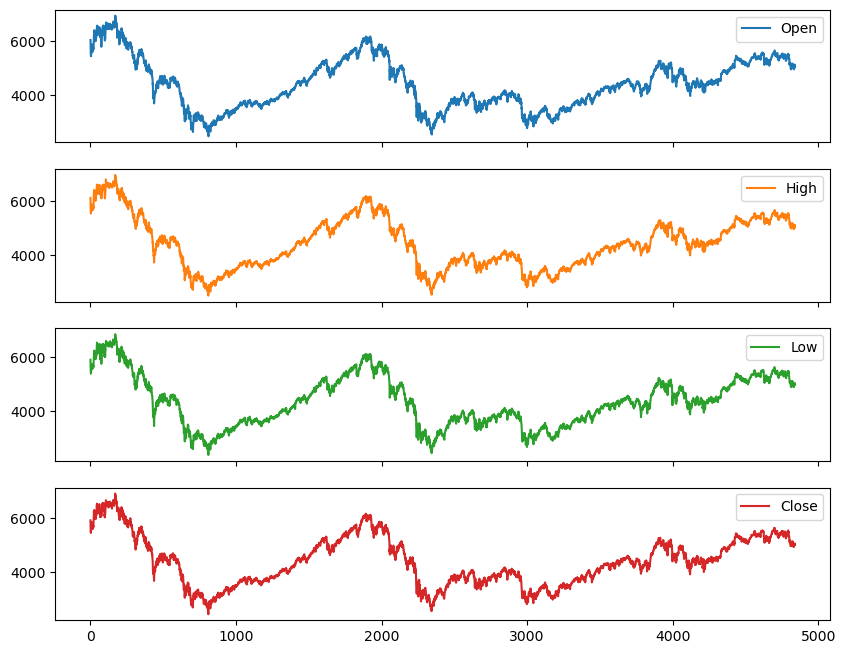

In [5]:
data.plot(subplots = True, layout = (5,1), figsize = (10, 10))

In [6]:
len = data.shape[0]
end = int(0.8 * len)
len

4841

In [7]:
newdata = data.iloc[:, 1]

In [8]:
X_train, y_train, X_test, y_test = [], [], [] , []

In [9]:
T = 10

In [10]:
for i in range(end):
  X_train.append(newdata[i:i+T])
  y_train.append(newdata[i+T])
X_train, y_train = np.array(X_train).reshape(end, T, 1), np.array(y_train).reshape(-1, 1)

In [11]:
for i in range(end - T, len - T):
  X_test.append(newdata[i:i+T])
  y_test.append(newdata[i+T])
X_test, y_test = np.array(X_test).reshape(len-end, T, 1), np.array(y_test).reshape(-1, 1)

In [12]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3872, 10, 1) (3872, 1) (969, 10, 1) (969, 1)


In [13]:
N = X_train.shape[2]
print(N)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, activation = 'relu', input_shape = (T,N)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(64, activation = 'linear'))
model.add(Dense(32, activation = 'linear'))
model.add(Dense(1, activation = 'relu'))

1


In [14]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [15]:
callback = callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights = True)

In [16]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32, callbacks = [callback])

Epoch 1/50
121/121 [==============================] - 12s 18ms/step - loss: 2382117.7500 - accuracy: 0.0000e+00
Epoch 2/50
121/121 [==============================] - 1s 10ms/step - loss: 13783.3623 - accuracy: 0.0000e+00
Epoch 3/50
121/121 [==============================] - 1s 10ms/step - loss: 12854.2334 - accuracy: 0.0000e+00
Epoch 4/50
121/121 [==============================] - 1s 11ms/step - loss: 12268.9932 - accuracy: 0.0000e+00
Epoch 5/50
121/121 [==============================] - 2s 13ms/step - loss: 11932.6279 - accuracy: 0.0000e+00
Epoch 6/50
121/121 [==============================] - 2s 13ms/step - loss: 11637.8311 - accuracy: 0.0000e+00
Epoch 7/50
121/121 [==============================] - 1s 10ms/step - loss: 11197.9150 - accuracy: 0.0000e+00
Epoch 8/50
121/121 [==============================] - 1s 9ms/step - loss: 10843.2695 - accuracy: 0.0000e+00
Epoch 9/50
121/121 [==============================] - 1s 10ms/step - loss: 10304.9424 - accuracy: 0.0000e+00
Epoch 10/50
121/1

In [17]:
predict_x=model.predict(X_test) 
for i in range(predict_x.shape[0]):
    print(predict_x[i], y_test[i])

31/31 [==============================] - 1s 8ms/step
[4757.097] [4865.68]
[4777.7407] [4885.]
[4797.9507] [4884.89]
[4823.367] [4905.77]
[4836.804] [4937.43]
[4852.4585] [4922.43]
[4871.822] [4882.94]
[4881.676] [4929.04]
[4898.1787] [4953.68]
[4907.34] [4940.64]
[4899.976] [4930.06]
[4906.387] [4900.37]
[4921.4985] [4990.96]
[4920.5728] [4997.94]
[4929.7505] [5019.02]
[4929.2354] [5065.62]
[4958.8857] [5032.18]
[4983.6743] [5029.97]
[4995.353] [5044.42]
[5006.342] [5078.25]
[5015.0806] [5040.86]
[5020.924] [5073.28]
[5033.2427] [4992.55]
[5039.6187] [5020.09]
[5008.357] [5052.25]
[5019.6655] [5073.99]
[5023.2173] [5009.63]
[5013.3003] [5068.06]
[5010.9526] [5106.36]
[5046.745] [5146.78]
[5044.14] [5156.16]
[5053.848] [5224.22]
[5091.9224] [5236.11]
[5118.773] [5252.48]
[5142.2153] [5230.98]
[5161.5107] [5246.75]
[5174.3354] [5214.33]
[5195.799] [5154.91]
[5203.06] [5205.1]
[5182.8013] [5210.7]
[5199.771] [5217.08]
[5188.0244] [5202.63]
[5184.901] [5198.79]
[5191.9917] [5256.79]
[5198.

[4473.503] [4551.73]
[4494.2036] [4560.46]
[4503.7876] [4523.96]
[4507.795] [4526.34]
[4517.29] [4515.25]
[4525.076] [4525.6]
[4519.392] [4532.34]
[4514.8022] [4437.99]
[4506.562] [4402.79]
[4472.2173] [4403.16]
[4463.191] [4440.11]
[4442.6147] [4454.58]
[4421.1606] [4350.07]
[4409.9526] [4577.01]
[4414.188] [4545.05]
[4450.7637] [4528.05]
[4447.601] [4524.98]
[4453.222] [4545.89]
[4486.7437] [4494.53]
[4492.796] [4547.05]
[4506.6006] [4525.46]
[4512.7944] [4561.7]
[4513.5615] [4557.93]
[4519.7] [4537.27]
[4528.514] [4548.85]
[4533.9873] [4544.09]
[4540.5054] [4506.91]
[4530.3413] [4548.98]
[4515.6855] [4571.2]
[4533.9067] [4527.84]
[4525.1484] [4506.66]
[4516.6743] [4576.87]
[4520.9834] [4676.61]
[4545.3545] [4709.89]
[4551.266] [4741.1]
[4578.6665] [4769.84]
[4624.323] [4754.22]
[4648.8755] [4778.96]
[4670.146] [4776.83]
[4686.0757] [4815.35]
[4711.679] [4820.49]
[4745.6704] [4822.3]
[4770.1284] [4831.56]
[4787.5566] [4825.15]
[4799.7847] [4837.41]
[4806.979] [4840.17]
[4813.263] [48

[5368.5786] [5429.43]
[5380.4937] [5405.61]
[5377.729] [5441.54]
[5395.926] [5437.71]
[5410.3667] [5409.67]
[5403.839] [5382.86]
[5406.819] [5399.19]
[5396.8325] [5445.24]
[5399.6455] [5463.29]
[5399.562] [5477.53]
[5403.356] [5490.2]
[5424.407] [5505.52]
[5447.1333] [5520.33]
[5460.1714] [5477.63]
[5465.2773] [5475.82]
[5471.6167] [5487.28]
[5481.0674] [5490.91]
[5475.7397] [5518.49]
[5470.778] [5487.92]
[5473.933] [5455.96]
[5473.8438] [5402.41]
[5451.5625] [5437.43]
[5435.186] [5414.75]
[5416.1733] [5326.17]
[5392.6025] [5356.49]
[5376.8696] [5362.37]
[5372.0356] [5372.02]
[5357.55] [5401.43]
[5336.739] [5422.39]
[5368.723] [5422.78]
[5370.3574] [5455.4]
[5385.7637] [5489.51]
[5406.257] [5495.95]
[5416.0786] [5494.02]
[5434.472] [5470.8]
[5448.5967] [5400.7]
[5451.9956] [5423.67]
[5427.7524] [5322.08]
[5414.934] [5254.7]
[5369.259] [5252.98]
[5346.567] [5250.76]
[5330.312] [5284.24]
[5294.814] [5294.58]
[5274.027] [5327.94]
[5261.4653] [5353.58]
[5287.046] [5344.55]
[5293.2803] [534

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(predict_x, y_test)

0.948746668457882

In [20]:
test = pd.DataFrame(y_test)
test['pred'] = predict_x

In [21]:
test.rename(columns = {0 : 'actual', 'pred' : 'predicted'}, inplace = True)
test

,actual,predicted
0,4865.68,4757.097168
1,4885.00,4777.740723
2,4884.89,4797.950684
3,4905.77,4823.367188
4,4937.43,4836.804199
...,...,...
964,4998.14,4947.270020
965,5026.66,4967.049316
966,5016.45,4968.475586
967,5112.58,4979.980957


<AxesSubplot:>

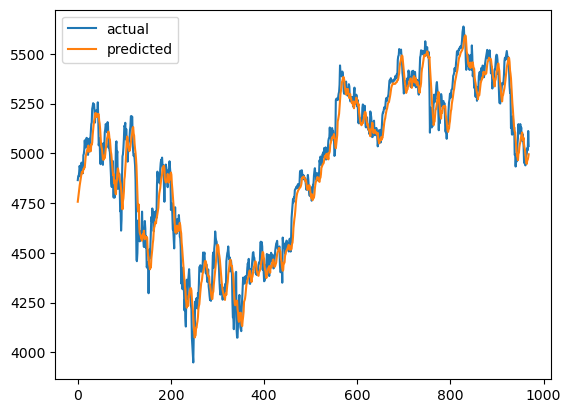

In [22]:
test.plot()


In [23]:
filename = 'model_pickle_cac40_lstm.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-2

In [24]:
new = X_test[-1]
final = y_test[-1]
np.append(new, final)
new

array([[4962.85],
       [4949.72],
       [4958.89],
       [4939.79],
       [4982.54],
       [4992.53],
       [4998.14],
       [5026.66],
       [5016.45],
       [5112.58]])

In [25]:
predictions = []
for i in range(50):
    fin = new.reshape(1, 10, 1)
    final = model.predict(fin)
    for j in final:
        new = np.append(new, j)
        predictions.append(j)
    new = new[1:]

1/1 [==============================] - 0s 34ms/step


In [26]:
predictions

[array([4995.5293], dtype=float32),
 array([5002.8804], dtype=float32),
 array([5006.906], dtype=float32),
 array([5018.4204], dtype=float32),
 array([5011.0396], dtype=float32),
 array([4994.7446], dtype=float32),
 array([4995.591], dtype=float32),
 array([4982.253], dtype=float32),
 array([4983.5312], dtype=float32),
 array([4967.5283], dtype=float32),
 array([4973.1353], dtype=float32),
 array([4955.1973], dtype=float32),
 array([4956.6406], dtype=float32),
 array([4940.968], dtype=float32),
 array([4939.3687], dtype=float32),
 array([4927.392], dtype=float32),
 array([4922.012], dtype=float32),
 array([4912.5073], dtype=float32),
 array([4904.9326], dtype=float32),
 array([4897.0474], dtype=float32),
 array([4888.734], dtype=float32),
 array([4881.197], dtype=float32),
 array([4872.872], dtype=float32),
 array([4865.241], dtype=float32),
 array([4857.1587], dtype=float32),
 array([4849.386], dtype=float32),
 array([4841.482], dtype=float32),
 array([4833.6514], dtype=float32),
 arr

In [27]:
x = [i+data['Close'].shape[0] for i in range(50)]

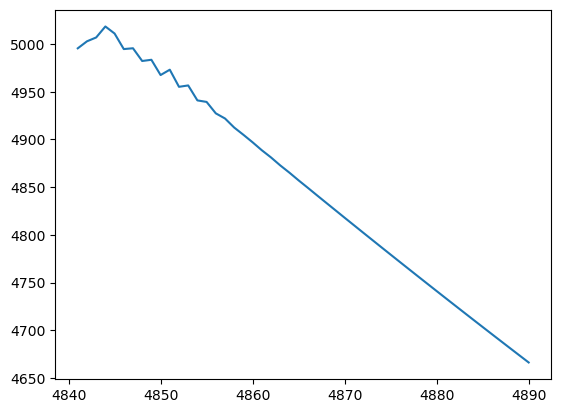

In [28]:
plt.plot(x,predictions)